# Fin 704: Econometric Theory and Applications
We will use Jupyter notebooks for some examples. This is one such notebook. As in any Python notebook, there are two types of cells, this one is a Markdown cell with text. The next rectangle is a code cell (as seen from square bracket to the left of the cell). Code cells can be executed by placing cursor in the cell and pressing Shift and Enter keys.

We start by first importing libraries that are useful for mathematical calculations and graphics. NumPy is a library with support for multi-dimensional arrays and matrices and other mathematical functions. Matplotlib is a plotting library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We next import pandas library for data manipulation and analysis and use it to read a data set from a csv file. The data set is one of the example data sets discussed in Woolridge's introductory book. We then use head function to see the first few rows of the data.

In [2]:
import pandas as pd
df = pd.read_csv("Data/wage2.csv")
df.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


The shape function gives the number of observtions and the number of variables.

In [3]:
df.shape

(935, 17)

The function describe can be used to see summary statistics for the variables in the data.

In [4]:
df.describe()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


The following is an example of a plot: a histogram. Note that it required matplotlib library imported earlier.

(array([ 40., 232., 314., 196.,  89.,  35.,  19.,   4.,   4.,   2.]),
 array([ 115. ,  411.3,  707.6, 1003.9, 1300.2, 1596.5, 1892.8, 2189.1,
        2485.4, 2781.7, 3078. ]),
 <BarContainer object of 10 artists>)

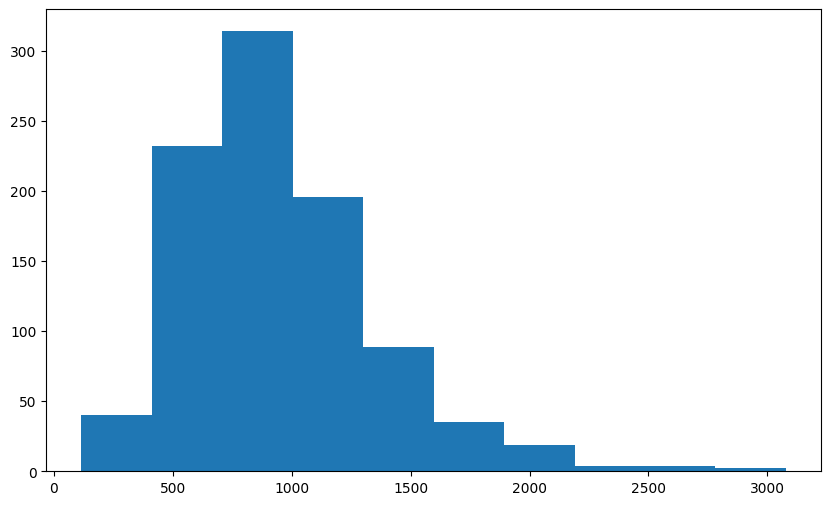

In [5]:
plt.figure(figsize=(10,6))
plt.hist(df["wage"], bins=10)

## Linear Regression in Python with scikit-learn
There are two common packages for linear regression in Python. The first one is scikit-learn.

In [399]:
#before continuing install libraries (if not already installed) scikit-learn and statsmodels
from sklearn.linear_model import LinearRegression
x = df[['IQ', 'educ', 'exper','age']] 
y = df['wage']
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])  
print(coefficients)

coefficient of determination: 0.170188890759296
intercept: -871.971973109974
coefficients: [ 5.24233636 52.09619896 11.20102412 14.14083018]
       Coefficient
IQ        5.242336
educ     52.096199
exper    11.201024
age      14.140830


## Linear Regression in Python with statsmodels
The second package for linear regression is statsmodels. The package has more econometric features than scikit-learn, which is more data science focused.

In [400]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     47.68
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.70e-36
Time:                        17:45:12   Log-Likelihood:                -6851.1
No. Observations:                 935   AIC:                         1.371e+04
Df Residuals:                     930   BIC:                         1.374e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -871.9720    159.787     -5.457      0.0

From the following figure, it appears that the conditional expectation of wage increases with education, as does the predicted wage. That is, regression results are uncorrelated with education. We use Seaborn library here for the plot.

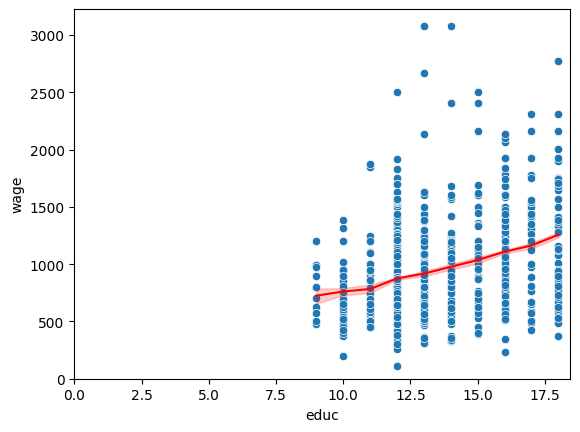

In [402]:
import seaborn as sns
# Linear prediction
ypred = results.predict(x)
# plotting the data points
sns.scatterplot(x=x['educ'], y=y)
#plotting the line
sns.lineplot(x=x['educ'],y=ypred, color='red')
#axes
plt.xlim(0)
plt.ylim(0)
plt.show()

## Least Squares Linear Predictor
We will now generate our own data, small in size, and see that the least squares linear predictor provides a projection of the dependent variable onto the space of the independent variables. We first simulate independent variables and error terms.

In [386]:
X = np.random.normal(0, 1, (4, 2))
u = np.random.normal(0, 10, (4, 1))
X = np.asmatrix(np.matrix.round(X, decimals=2))
u = np.asmatrix(np.matrix.round(u, decimals=2))
print('X =\n',X)
print('u=\n',u)

X =
 [[-1.45  1.97]
 [ 0.98 -0.88]
 [ 0.78 -0.  ]
 [-0.72 -1.2 ]]
u=
 [[-1.42]
 [-3.19]
 [11.97]
 [-3.09]]


We next assume Classical Linear Regression Model: the expected value of dependent variable y is linear in the independent variables. We pick values of coefficients and use these to calculate  the values of the dependent variable.

In [394]:
beta = np.matrix([[1], [2]])
print('beta =\n',beta)
y = np.asmatrix(X*beta + u)
print('y=\n',y)

beta =
 [[1]
 [2]]
y=
 [[ 1.07]
 [-3.97]
 [12.75]
 [-6.21]]


A linear predictor is a linear function of independent variables that fits data. In this case, it is a plane that predicts value of y given values of x1 and x2. The least squares predictor minimizes the sum of squares of vertical distances of data points from the plane.

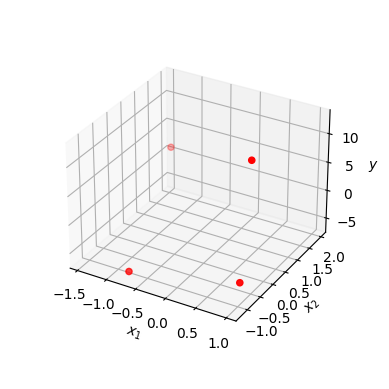

In [395]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')
 
ax.scatter(X[:,0], X[:,1], y, color='red')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$y$',rotation=0)
ax.set_box_aspect(None, zoom=0.8)
 
plt.show()

We now calculate the least squares estimator for coefficients.

In [396]:
print("X'X = \n",X.T*X)
print("(X'X)^{-1} = \n",(X.T*X).I)
print("(X'X)^{-1}X' = \n",(X.T*X).I*X.T)
print("beta_hat = (X'X)^{-1}X'y = \n",(X.T*X).I*X.T*y)

X'X = 
 [[ 4.1897 -2.8549]
 [-2.8549  6.0953]]
(X'X)^{-1} = 
 [[0.35056602 0.16419716]
 [0.16419716 0.24096705]]
(X'X)^{-1}X' = 
 [[-0.18485233  0.1990612   0.2734415  -0.44944413]
 [ 0.23661921 -0.05113779  0.12807378 -0.40738242]]
beta_hat = (X'X)^{-1}X'y = 
 [[5.28936216]
 [4.61898512]]


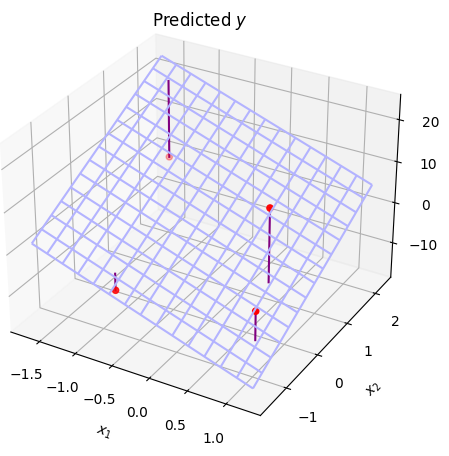

In [397]:
def f(x1t, x2t):
    return np.ndarray.item(beta_hat[0])*x1t + np.ndarray.item(beta_hat[1])*x2t
x1min = 1.1*np.min(X[:,0]) - 0.1*np.max(X[:,0])
x1max = 1.1*np.max(X[:,0]) - 0.1*np.min(X[:,0])
x2min = 1.1*np.min(X[:,1]) - 0.1*np.max(X[:,1])
x2max = 1.1*np.max(X[:,1]) - 0.1*np.min(X[:,1])
x1range = np.linspace(x1min, x1max, 15)
x2range = np.linspace(x2min, x2max, 15)
  
x1s, x2s = np.meshgrid(x1range, x2range)
ys = f(x1s, x2s)
yhat = f(X[:,0], X[:,1])

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(x1s, x2s, ys, color =(0.7,0.7,1))
ax.scatter(X[:,0], X[:,1], y, color='red')
#ax.scatter(X[:,0], X[:,1], yhat, color='green')
for i in range(4):
    ax.plot([X[i,0], X[i,0]], [X[i,1],X[i,1]],zs=[y[i,0],yhat[i,0]],color='purple')
ax.set_title('Predicted $y$');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$y$',rotation=0)
ax.set_box_aspect(None, zoom=1.2)

## Least Squares Regression with Linear Constraint
We now consider least squares estimation under a linear restriction of the form Q*Beta=c. Specifically, consider a restriction on the sum of coefficients. The regression coefficients beta_bar can be obtained from beta_hat, X, Q and c.

In [391]:
Q = np.matrix([[1],[1]])
c = 2
beta_bar = beta_hat - (X.T*X).I*Q*(Q.T*(X.T*X).I*Q).I*(Q.T*beta_hat-c)

The following figure shows the projection as a result of least squares estimation with constraints. It may not fit the data (X) as well as unconstrained estimation above does.  

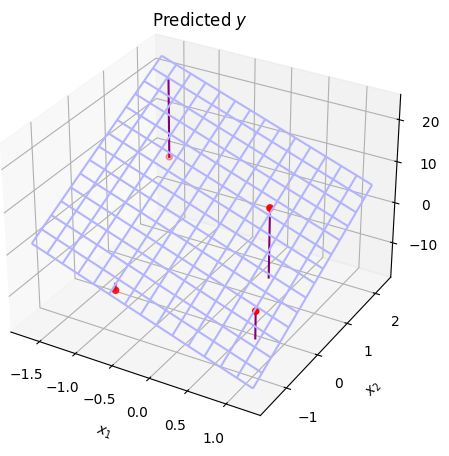

In [392]:
def g(x1t, x2t):
    return np.ndarray.item(beta_bar[0])*x1t + np.ndarray.item(beta_bar[1])*x2t

x1min = 1.1*np.min(X[:,0]) - 0.1*np.max(X[:,0])
x1max = 1.1*np.max(X[:,0]) - 0.1*np.min(X[:,0])
x2min = 1.1*np.min(X[:,1]) - 0.1*np.max(X[:,1])
x2max = 1.1*np.max(X[:,1]) - 0.1*np.min(X[:,1])
x1range = np.linspace(x1min, x1max, 15)
x2range = np.linspace(x2min, x2max, 15)
  
x1s, x2s = np.meshgrid(x1range, x2range)
ys = f(x1s, x2s)
yhat = g(X[:,0], X[:,1])
 
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(x1s, x2s, ys, color =(0.7,0.7,1))
ax.scatter(X[:,0], X[:,1], y, color='red')
#ax.scatter(X[:,0], X[:,1], yhat, color='green')
for i in range(4):
    ax.plot([X[i,0], X[i,0]], [X[i,1],X[i,1]],zs=[y[i,0],yhat[i,0]],color='purple')
ax.set_title('Predicted $y$');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$y$',rotation=0)
ax.set_box_aspect(None, zoom=1.2)

In [393]:
print('beta_bar=\n',beta_bar)
print('Sum of Coefficients = ',np.ndarray.item(Q.T*beta_bar))

beta_bar=
 [[-4.68735138]
 [ 6.68735138]]
Sum of Coefficients =  2.0


## Projection and Annihilator Matrices
We now demonstrate some properties of projection and annihilator matrices in an example.

In [290]:
X = np.matrix([[1, 1],[2, 4],[3,9],[4,16]])
print(X)

[[ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]]


Let is calculate projection matrix P = (X'X)^{-1}X'y.

In [291]:
P=X*(X.T*X).I*X.T
print(P)

[[ 0.29677419  0.36774194  0.21290323 -0.16774194]
 [ 0.36774194  0.47741935  0.32903226 -0.07741935]
 [ 0.21290323  0.32903226  0.3483871   0.27096774]
 [-0.16774194 -0.07741935  0.27096774  0.87741935]]


Note that P is symmetric. Next let us verify P is idempotent. That means P*P equals P.

In [292]:
print(P*P)

[[ 0.29677419  0.36774194  0.21290323 -0.16774194]
 [ 0.36774194  0.47741935  0.32903226 -0.07741935]
 [ 0.21290323  0.32903226  0.3483871   0.27096774]
 [-0.16774194 -0.07741935  0.27096774  0.87741935]]


Projection matrix can be viewed as an operator. That is, if it is multiplied with a vector, it returns a projection of the vector on the space of independent variables. That is, the projection is spanned by independent variables and the difference between the vector and its projection is orthogonal too all independent variables. Let us consider a vector that is spanned by independent variables. The projection matrix will leave it unchanged.

In [366]:
z=X*np.matrix([[5],[7]])
print(z)
print(P*z)

[[ 12]
 [ 38]
 [ 78]
 [132]]
[[ 12.]
 [ 38.]
 [ 78.]
 [132.]]


The annihilator matrix is the complement of the projection matrix. M = I - P.

In [368]:
M = np.identity(4) - P
print(M)

[[ 0.70322581 -0.36774194 -0.21290323  0.16774194]
 [-0.36774194  0.52258065 -0.32903226  0.07741935]
 [-0.21290323 -0.32903226  0.6516129  -0.27096774]
 [ 0.16774194  0.07741935 -0.27096774  0.12258065]]


The annihilator matrix M is also symmetric and idempotent.

In [369]:
print(M*M)

[[ 0.70322581 -0.36774194 -0.21290323  0.16774194]
 [-0.36774194  0.52258065 -0.32903226  0.07741935]
 [-0.21290323 -0.32903226  0.6516129  -0.27096774]
 [ 0.16774194  0.07741935 -0.27096774  0.12258065]]


The annihilator matrix is also an operator and returns the component of a vector that is orthogonal to all the independent variables. Since the vector Z is spanned by independent variables, it has no orthogonal component. The annihilator matrix "annihilates" such a vector. (The small number in the result below are due to rounding errors.)

In [370]:
print(M*z)

[[-1.11910481e-13]
 [-1.91846539e-13]
 [-7.81597009e-14]
 [-2.87769808e-13]]


Now we apply M to another vector and show that the result is orthogonal to all independent variables. 

In [377]:
z=np.matrix([[10],[20],[3],[40]])
print(np.shape(M*z))
print(X.T*M*z)

(4, 1)
[[-4.75841588e-13]
 [-1.57740487e-12]]


## Simulation for Bias and Variance of Estimators
Now we see an example of a Monte Carlo simulation. We consider a model where y is linearly related to two independent variables and there are iid normal error terms. We will assume true parameters (means and variances of variables and error terms and intercept and two coefficients). In each iteration of the simulation, we will draw a random sample and then calculate least squares predictors of the intercept and the two coefficients. Finally, we will examine the distribution of these estimates across all iterations and report their means and variances and also draw their distributions.

Beta
        Coefficient
Beta0            5
Beta1            2
Beta2           -1

BetaHat
               Mean
Beta0hat  5.000817
Beta1hat  1.999652
Beta2hat -1.003058

Expected Variance
           Beta0hat  Beta1hat  Beta2hat
Beta0hat  0.023438 -0.007812 -0.007812
Beta1hat -0.007812  0.007812  0.000000
Beta2hat -0.007812  0.000000  0.007812

Estimated Variance
           Variance
Beta0hat  0.023426
Beta1hat  0.008514
Beta2hat  0.007427


<AxesSubplot: ylabel='Density'>

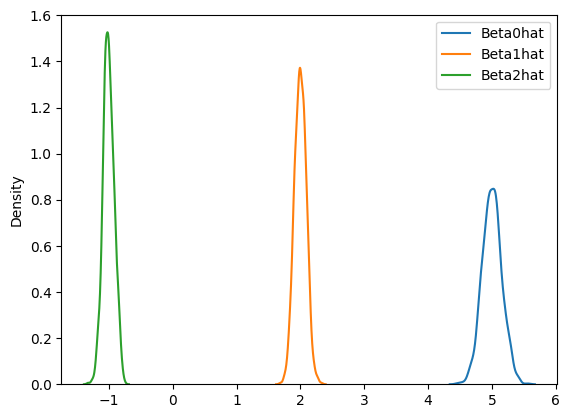

In [296]:
#set sample size
n=128

#set number of iterations
iterations = 1000

betas = np.matrix([[5],[2],[-1]])
betasplus = np.asmatrix(np.concatenate((betas,[[1]]),axis=0))
mua = 1
sigmaa = 1
mub = 1
sigmab = 1
sigma = 1

ones = np.ones((n,1))

#initialize results storage
#betahats = np.empty((3,iterations))
betahats = np.empty((3,0))

for i in range(iterations):
    #draw a sample
    avals = np.random.normal(mua,sigmaa,size=(n,1))
    bvals = np.random.normal(mub,sigmab,size=(n,1))
    uvals = np.random.normal(0,sigma,size=(n,1))
    xvals=np.asmatrix(np.concatenate((ones,avals,bvals),axis=1))
    xvalsplus=np.asmatrix(np.concatenate((xvals,uvals),axis=1))
    yvals=xvalsplus*betasplus
    betahat=(xvals.T*xvals).I*xvals.T*yvals
    betahats=np.concatenate((betahats,betahat),axis=1)

print('Beta\n',pd.DataFrame(betas, ['Beta0','Beta1','Beta2'], columns=['Coefficient']))
print('\nBetaHat\n',pd.DataFrame(np.mean(betahats,axis=1), ['Beta0hat','Beta1hat','Beta2hat'], columns=['Mean']))
EXprimeX = n*np.matrix([[1, mua, mub],[mua, mua**2 + sigma**2, mua*mub],[mub, mua*mub, mub**2 + sigmab**2]])
print('\nExpected Variance\n',pd.DataFrame(sigma**2*EXprimeX.I, ['Beta0hat','Beta1hat','Beta2hat'], columns=['Beta0hat','Beta1hat','Beta2hat']))
print('\nEstimated Variance\n',pd.DataFrame(np.var(betahats,ddof=1,axis=1), ['Beta0hat','Beta1hat','Beta2hat'], columns=['Variance']))
#sns.kdeplot(betahats.T)
sns.kdeplot(pd.DataFrame(betahats.T, columns=['Beta0hat','Beta1hat','Beta2hat']))

## Module for Simulation
Let us now create a module for simulation so that we can rerun the simulation easily with different coefficients, sample sizes, or number of iterations.

In [297]:
def regression_simulation(beta0=1,beta1=1,beta2=1,mua=0,sigmaa=1,mub=0,sigmab=1,sigma=1,iterations=1000,n=32):
    #True parameters
    betas = np.matrix([[beta0],[beta1],[beta2]])
    betasplus = np.asmatrix(np.concatenate((betas,[[1]]),axis=0))

    ones = np.ones((n,1))
    #initialize results storage
    betahats = np.empty((3,0))

    for i in range(iterations):
        #draw a sample
        avals = np.random.normal(mua,sigmaa,size=(n,1))
        bvals = np.random.normal(mub,sigmab,size=(n,1))
        uvals = np.random.normal(0,sigma,size=(n,1))
        xvals=np.asmatrix(np.concatenate((ones,avals,bvals),axis=1))
        xvalsplus=np.asmatrix(np.concatenate((xvals,uvals),axis=1))
        yvals=xvalsplus*betasplus
        betahat=(xvals.T*xvals).I*xvals.T*yvals
        betahats=np.concatenate((betahats,betahat),axis=1)

    print('Beta\n',pd.DataFrame(betas, ['Beta0','Beta1','Beta2'], columns=['Coefficient']))
    print('\nBetaHat\n',pd.DataFrame(np.mean(betahats,axis=1), ['Beta0hat','Beta1hat','Beta2hat'], columns=['Mean']))
    EXprimeX = n*np.matrix([[1, mua, mub],[mua, mua**2 + sigma**2, mua*mub],[mub, mua*mub, mub**2 + sigmab**2]])
    print('\nExpected Variance\n',pd.DataFrame(sigma**2*EXprimeX.I, ['Beta0hat','Beta1hat','Beta2hat'], columns=['Beta0hat','Beta1hat','Beta2hat']))
    print('\nEstimated Variance\n',pd.DataFrame(np.var(betahats,ddof=1,axis=1), ['Beta0hat','Beta1hat','Beta2hat'], columns=['Variance']))
    sns.kdeplot(pd.DataFrame(betahats.T, columns=['Beta0hat','Beta1hat','Beta2hat']))

We will now use the above module to run a simulation, providing a set of values for coefficients, number of iterations, sample size, etc.

Beta
        Coefficient
Beta0           10
Beta1           -3
Beta2            4

BetaHat
                Mean
Beta0hat  10.112802
Beta1hat  -3.002339
Beta2hat   4.012318

Expected Variance
           Beta0hat  Beta1hat  Beta2hat
Beta0hat   3.56250  -0.21875   0.25000
Beta1hat  -0.21875   0.03125   0.00000
Beta2hat   0.25000   0.00000   0.03125

Estimated Variance
           Variance
Beta0hat  4.373201
Beta1hat  0.038709
Beta2hat  0.037070


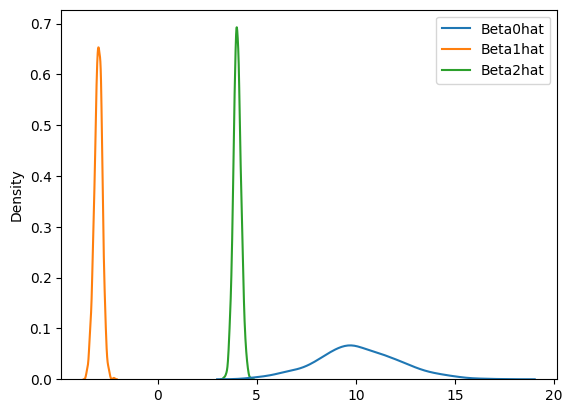

In [298]:
regression_simulation(10,-3,4,7,1,-8,1,1,1000,32)

This time we will increase sample sizes and see that estimation becomes more precise.

Beta
        Coefficient
Beta0           10
Beta1           -3
Beta2            4

BetaHat
                Mean
Beta0hat  10.013301
Beta1hat  -3.003234
Beta2hat   3.998860

Expected Variance
           Beta0hat  Beta1hat  Beta2hat
Beta0hat  0.890625 -0.054688  0.062500
Beta1hat -0.054688  0.007812  0.000000
Beta2hat  0.062500  0.000000  0.007812

Estimated Variance
           Variance
Beta0hat  0.913247
Beta1hat  0.007642
Beta2hat  0.007778


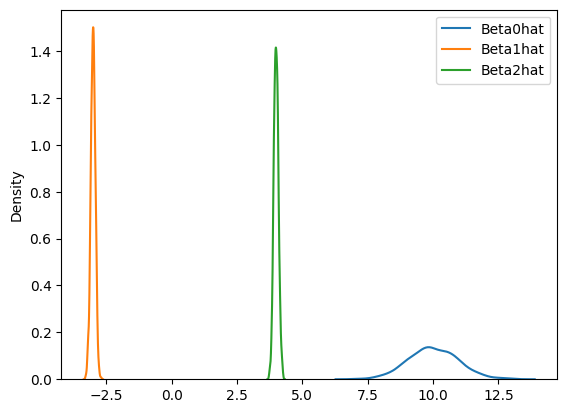

In [114]:
regression_simulation(10,-3,4,7,1,-8,1,1,1000,128)

Now we make the module for simulation more general, allowing linear regression with any number of variables. About half of the code in the module is checking whether the inputs are reasonable.

In [191]:
def linear_regression_simulation(intercept=0,betas=1,xmeans=0,xSigma=1,sigma=1,iterations=1000,n=32):
    #Check inputs
    nvars = 0
    if np.ndim(betas) > 1:
        raise ValueError("betas should be a constant or a 1d array")
    else:
        nvars = max(nvars, np.size(betas))
    if np.ndim(xmeans) > 1:
        raise ValueError("xmeans should be a constant or a 1d array")
    else:
        nvars = max(nvars, np.size(xmeans))
    if np.ndim(xSigma) > 2:
        raise ValueError("xSigma should be a constant or 1d or 2d array")
    elif np.ndim(xSigma) == 2:
        if np.shape(xSigma)[0] != np.shape(xSigma)[1]:
            raise ValueError("xSigma should be a square matrix")
        elif np.min(np.linalg.eigvals(xSigma)) <= 0:
            raise ValueError("xSigma should be positive definite")
        else:
            nvars = max(nvars, np.shape(xSigma))
    elif np.min(xSigma) <= 0:
        raise ValueError("xSigma should be positive definite")
    else:
        nvars = max(nvars, np.size(xSigma))

    if np.ndim(betas) == 1 and np.ndim(xmeans) == 1 and np.size(betas) != np.size(xmeans):
        raise ValueError("betas and xmeans should be for the same number of variables")
    if np.ndim(betas) == 1 and np.ndim(xSigma) > 0 and np.size(betas) != np.size(xSigma,0):
        raise ValueError("betas and xSigma should be for the same number of variables")
    if np.ndim(xmeans) == 1 and np.ndim(xSigma) > 0 and np.size(xmeans) != np.size(xSigma,0):
        raise ValueError("xmeans and xSigma should be for the same number of variables")
        
    if sigma <= 0:
        raise ValueError("sigma should be positive")
    
    if np.ndim(betas) == 0:
        betas = betas * np.ones(nvars)
    if np.ndim(xmeans) == 0:
        xmeans = xmeans * np.ones(nvars)
    if np.ndim(xSigma) < 2:
        squareSigma = np.zeros((nvars,nvars),float)
        np.fill_diagonal(squareSigma,xSigma)
        xSigma = squareSigma
    
    #True parameters
    betas = np.matrix(betas).T
    betas = np.asmatrix(np.concatenate(([[intercept]],betas),axis=0))
    betasplus = np.asmatrix(np.concatenate((betas,[[1]]),axis=0))

    ones = np.ones((n,1))
    #initialize results storage
    betahats = np.empty((nvars+1,0))

    for i in range(iterations):
        #draw a sample
        xvals = np.asmatrix(np.random.multivariate_normal(xmeans,xSigma,n))
        xvals=np.asmatrix(np.concatenate((ones,xvals),axis=1))
        uvals = np.random.normal(0,sigma,size=(n,1))
        xvalsplus=np.asmatrix(np.concatenate((xvals,uvals),axis=1))
        yvals=xvalsplus*betasplus
        betahat=(xvals.T*xvals).I*xvals.T*yvals
        betahats=np.concatenate((betahats,betahat),axis=1)

    rowlabels = np.concatenate((['intercept'],[f'beta{i}' for i in range(1, nvars+1)]),axis=0)
    print('Beta\n',pd.DataFrame(betas, rowlabels, columns=['Coefficient']))
    rowlabels = np.concatenate((['intercepthat'],[f'betahat{i}' for i in range(1, nvars+1)]),axis=0)
    print('\nBetaHat\n',pd.DataFrame(np.mean(betahats,axis=1), rowlabels, columns=['Mean']))
    addfirstcol = np.zeros((nvars,1),float)
    EXprimeX = np.concatenate((addfirstcol,xSigma),axis=1)
    addfirstrow = np.zeros((1,nvars+1),float)
    EXprimeX = np.concatenate((addfirstrow,EXprimeX),axis=0)
    xmeans = np.asmatrix(np.concatenate(([1],xmeans),axis=0))
    EXprimeX = n*(np.matrix(EXprimeX) + xmeans.T*xmeans)
    print('\nExpected Variance\n',pd.DataFrame(sigma**2*EXprimeX.I, rowlabels, columns=rowlabels))
    print('\nEstimated Variance\n',pd.DataFrame(np.var(betahats,ddof=1,axis=1), rowlabels, columns=['Variance']))
    sns.kdeplot(pd.DataFrame(betahats.T, columns=rowlabels))

Let us try the above module, once by providing some inputs, and the next time by not providing any inputs (in this case, the module chooses default values).

Beta
            Coefficient
intercept            5
beta1                2
beta2                3
beta3                4

BetaHat
                   Mean
intercepthat  5.006666
betahat1      2.002917
betahat2      3.001862
betahat3      3.987672

Expected Variance
               intercepthat  betahat1  betahat2  betahat3
intercepthat       0.12500  -0.03125  -0.03125  -0.03125
betahat1          -0.03125   0.03125   0.00000   0.00000
betahat2          -0.03125   0.00000   0.03125   0.00000
betahat3          -0.03125   0.00000   0.00000   0.03125

Estimated Variance
               Variance
intercepthat  0.154460
betahat1      0.039441
betahat2      0.037371
betahat3      0.036525


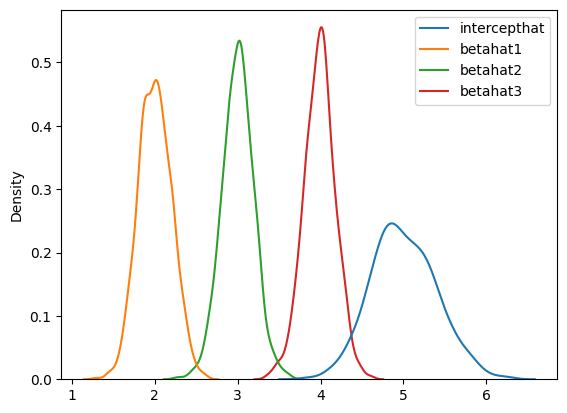

In [192]:
linear_regression_simulation(5,[2,3,4],1,1,1,1000,32)

Beta
            Coefficient
intercept          0.0
beta1              1.0

BetaHat
                   Mean
intercepthat -0.003132
betahat1      1.003915

Expected Variance
               intercepthat  betahat1
intercepthat       0.03125   0.00000
betahat1           0.00000   0.03125

Estimated Variance
               Variance
intercepthat  0.033308
betahat1      0.035453


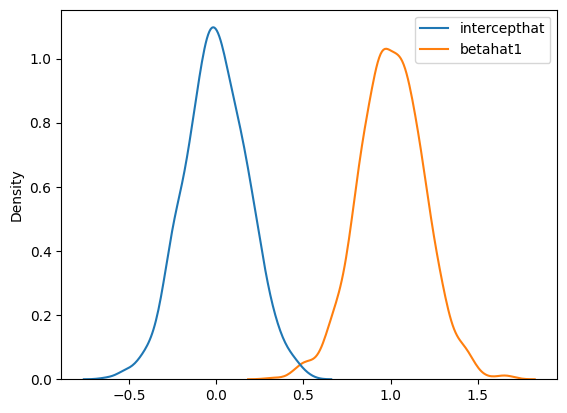

In [193]:
linear_regression_simulation()

## Simulation for Asymptotics
The next module runs a simulation to examine how regression estimators change with sample size.

In [362]:
def linear_regression_asymptotics(intercept=0,betas=1,xmeans=0,xSigma=1,sigma=1,samples=100,n=32):
    #Check inputs
    nvars = 0
    if np.ndim(betas) > 1:
        raise ValueError("betas should be a constant or a 1d array")
    else:
        nvars = max(nvars, np.size(betas))
    if np.ndim(xmeans) > 1:
        raise ValueError("xmeans should be a constant or a 1d array")
    else:
        nvars = max(nvars, np.size(xmeans))
    if np.ndim(xSigma) > 2:
        raise ValueError("xSigma should be a constant or 1d or 2d array")
    elif np.ndim(xSigma) == 2:
        if np.shape(xSigma)[0] != np.shape(xSigma)[1]:
            raise ValueError("xSigma should be a square matrix")
        elif np.min(np.linalg.eigvals(xSigma)) <= 0:
            raise ValueError("xSigma should be positive definite")
        else:
            nvars = max(nvars, np.shape(xSigma))
    elif np.min(xSigma) <= 0:
        raise ValueError("xSigma should be positive definite")
    else:
        nvars = max(nvars, np.size(xSigma))

    if np.ndim(betas) == 1 and np.ndim(xmeans) == 1 and np.size(betas) != np.size(xmeans):
        raise ValueError("betas and xmeans should be for the same number of variables")
    if np.ndim(betas) == 1 and np.ndim(xSigma) > 0 and np.size(betas) != np.size(xSigma,0):
        raise ValueError("betas and xSigma should be for the same number of variables")
    if np.ndim(xmeans) == 1 and np.ndim(xSigma) > 0 and np.size(xmeans) != np.size(xSigma,0):
        raise ValueError("xmeans and xSigma should be for the same number of variables")
        
    if sigma <= 0:
        raise ValueError("sigma should be positive")
    
    if np.ndim(betas) == 0:
        betas = betas * np.ones(nvars)
    if np.ndim(xmeans) == 0:
        xmeans = xmeans * np.ones(nvars)
    if np.ndim(xSigma) < 2:
        squareSigma = np.zeros((nvars,nvars),float)
        np.fill_diagonal(squareSigma,xSigma)
        xSigma = squareSigma
    
    #True parameters
    betas = np.matrix(betas).T
    betas = np.asmatrix(np.concatenate(([[intercept]],betas),axis=0))
    betasplus = np.asmatrix(np.concatenate((betas,[[1]]),axis=0))

    ones = np.ones((n,1))
    #initialize data and results storage
    allxvals = np.empty((0,nvars+1))
    allxvalsplus = np.empty((0,nvars+2))
    allyvals = np.empty((0,1))
    betahats = np.empty((nvars+1,0))

    for i in range(samples):
        #draw a sample
        xvals = np.asmatrix(np.random.multivariate_normal(xmeans,xSigma,n))
        xvals=np.asmatrix(np.concatenate((ones,xvals),axis=1))
        uvals = np.random.normal(0,sigma,size=(n,1))
        xvalsplus=np.asmatrix(np.concatenate((xvals,uvals),axis=1))
        yvals=xvalsplus*betasplus
        allxvals=np.concatenate((allxvals,xvals),axis=0)
        allxvalsplus=np.concatenate((allxvalsplus,xvalsplus),axis=0)
        allyvals=np.concatenate((allyvals,yvals),axis=0)
        betahat=(allxvals.T*allxvals).I*allxvals.T*allyvals
        betahats=np.concatenate((betahats,betahat),axis=1)

    samplesize = n*np.arange(1,samples+1)
    labels = np.concatenate((['intercept'],[f'beta{i}hat' for i in range(1, nvars+1)]),axis=0)
    from matplotlib.pyplot import cm
    color = cm.rainbow(np.linspace(0, 1, nvars+1))
    for i,j,c,l in zip(betahats,betas,color,labels):  
        plt.plot(samplesize,i.T,color=c,label='l')
        plt.plot(samplesize,np.repeat(j,samples,0),color=c,linestyle='dashed',label='_nolegend_')
        plt.legend(labels)    
    plt.show()

We execute the above module and see that the estimators converge to the true parameter estimates, as expected with consistent estimators.

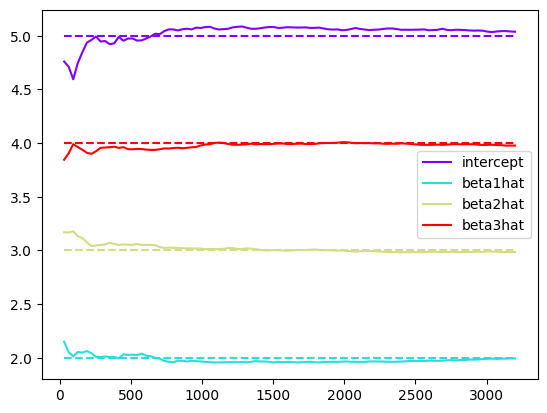

In [363]:
linear_regression_asymptotics(5,[2,3,4],1,1,1,100,32)

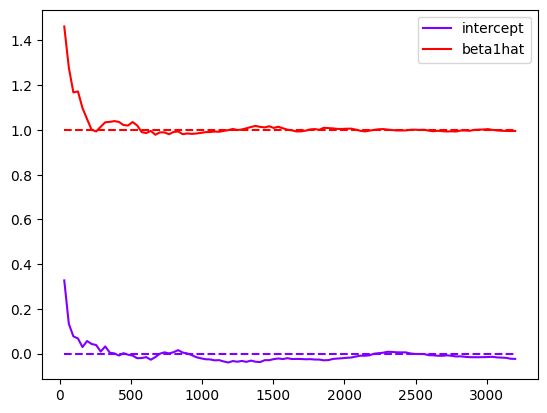

In [364]:
linear_regression_asymptotics()